<a href="https://colab.research.google.com/github/mpaydar/CS381/blob/main/M_Bayat_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Overview of dataset
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 
21 and above.

#Description of attrubutes
 
1. Pregnancies:
       Number of times pregnant (preg)
2. Glucose:
       Plasma glucose concentration a 2 hours in an oral  
       glucose tolerance test (plas)
3. BloodPressure:
       Diastolic blood pressure in mm Hg
4. SkinThickness: 
       Triceps skin fold thickness in mm (skin)
5. Insulin:
       2-Hour serum insulin in mu U/ml (insu)

6. BMI 
        Body mass index measured as weight in kg/(height in m)^2 (mass)
7. DiabetesPedigreeFunction:
        Diabetes pedigree function (pedi)

        Indicates the function which scores likelihood of 
        diabetes based on family history. 

8. Age:
        Age in years (age)
9. Outcome:
        The risk of being diabetic. 
        according to measurement of genetic influence 
        gave us an idea of the  hereditary risk one might 
        have with the onset of diabetes mellitus.

        (0 if non-diabetic, 1 if diabetic)



**Background Knowledge:**
#Glucose:
n= Glucose level; unit: mg/dL


n<140 mg/dL (7.8 mmol/L) = Normal

-----------------------------------------

140<n <199 = prediabetes

--------------------------------------
200 mg/dl < n = diabetes



#Blood Pressure: 

We have systolic pressure and diastolic pressure 

 ------------------------------------------
Normal blood pressure:  

systolic pressure < 120

diastolic pressure < 80

------------------------------------------

Elevated blood pressure:
     
120 < systolic pressure < 129    with

diastolic pressure < 80

-------------------------------------------
High blood pressure:

systolic pressure < 130
 
  or 

80 < diastolic pressure 

-------------------------------------------------

isolated systolic hypertension:

 130 < systolic pressure with  diastolic pressure < 80

This is due to age-related stiffening of the major arteries. It is the most common form of high blood pressure in older adults and can lead to serious health problems in addition to shortness of breath during light physical activity, lightheadedness upon standing too fast. 


# Skin Thickness

skin thickness is increased and significantly related to duration of diabetes

# Insulin

Normal:

blood sugar<100 mg/Dl

---------------------------------------------------

prediabetes:

100 mg/Dl< blood sugar < 125 mg/DL

---------------------------------------------------

diabetes:

126 mg/Dl< blood sugar 



#BMI

Below 18.5                  	Underweight

----------------------------------------------------

18.5—24.9	                      Healthy

-----------------------------------------------------


25.0—29.9	                      Overweight

-----------------------------------------------------


30.0 and Above                  	Obese






In [3]:
import pandas as pd 
import numpy as np


dataframe=pd.read_csv("https://raw.githubusercontent.com/mpaydar/CS381/main/project1/diabetes.csv")
print(dataframe.head())


print("-------------------------------------")
print("\n")
records,attributes=dataframe.shape
print (f'There are {attributes} attributes and {records} records')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
-------------------------------------


There are 9 attributes and 768 records


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Each attributes has one data type , so this is good as we don't to be worried on cleaning the data from multiple data types in a column. 

In [5]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking at the statistic facts, we see the minimum, for Pregnancies,Glucose	BloodPressure,SkinThickness	,Insulin,	BMI, is 0 . It does not make sense to have 0 for these attributes since all these values have real value of greater than 0. 


Also notice the average age of women participating in this survery is 33. Age has strong correlation with the outcome of the analysis. Looking at at the correlation table Age and Outcome have 24 % correlation. 


The other fact which is interesting is the high standard deviation for Insulin:115. It might be due to the fact that we are missing a lot of enteries for Insulin column.  

# Looking at the correlation table

In [6]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


As it could be seen all the attributes have some impact on the whether a person is diabetic or not . Note the following correlation:

Outcome and Glucose: 0.46

Outcome and BMI: 0.29

Outcome and Pregnancies: 0.22

Outcome and age: 0.23



# Checking For NULL

In [7]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Null Values checked, everything looks good and no missing values are there 

# Checking Outlier

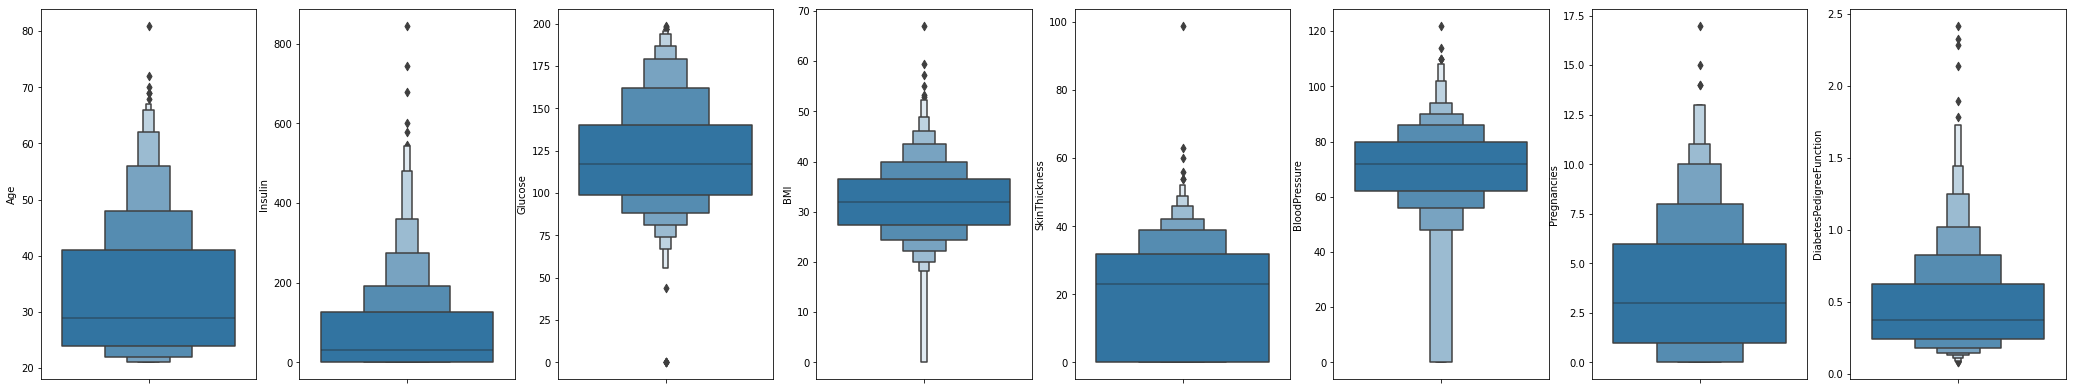

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt






# values=dataframe[['Age' , 'Insulin' , 'Glucose' , 'BMI' ,'SkinThickness','BloodPressure','Pregnancies','DiabetesPedigreeFunction' ]]
# sns.catplot(data=values,kind='box',height=4,aspect=10)


plt.subplot(2,8,1)
sns.boxenplot(y=dataframe['Age'],x=None,data=dataframe)


plt.subplot(2,8,2)
sns.boxenplot(y=dataframe['Insulin'],x=None,data=dataframe)

plt.subplot(2,8,3)
sns.boxenplot(y=dataframe['Glucose'],x=None,data=dataframe)

plt.subplot(2,8,4)
sns.boxenplot(y=dataframe['BMI'],x=None,data=dataframe)

plt.subplot(2,8,5)
sns.boxenplot(y=dataframe['SkinThickness'],x=None,data=dataframe)

plt.subplot(2,8,6)
sns.boxenplot(y=dataframe['BloodPressure'],x=None,data=dataframe)

plt.subplot(2,8,7)
sns.boxenplot(y=dataframe['Pregnancies'],x=None,data=dataframe)


plt.subplot(2,8,8)
sns.boxenplot(y=dataframe['DiabetesPedigreeFunction'],x=None,data=dataframe)

plt.gcf().set_size_inches(15, 15)
plt.subplots_adjust(right=2)

plt.show()


## 0-Min Issue
Looking at the boxplots , we see the problem of minimum 0 for attributes as stated earlier. Most problem is with Insulin and SkinThickness. Since, we are missing a lot of data for inulsin and the level of insulin somehow provide similiar information as glucose, best decision is to drop this column. 


In [9]:
# Checking To see what percentage of Insulin enteries are 0

def isZero(frame):
  a1,b1=frame.shape
  a2=dataframe['Insulin'].where(frame['Insulin']==0).value_counts()
  answer1=(a2/a1) * 100
  answer1



  a3=frame['Glucose'].where(frame['Glucose']==0).value_counts()
  answer2=(a3/a1) * 100
  answer2


  a4=frame['BMI'].where(frame['BMI']==0).value_counts()
  answer3=(a4/a1) * 100
  answer3


  a5=frame['SkinThickness'].where(frame['SkinThickness']==0).value_counts()
  answer4=(a5/a1) * 100
  answer4


  a6=frame['BloodPressure'].where(frame['BloodPressure']==0).value_counts()
  answer5=(a6/a1) * 100
  answer5




  return pd.DataFrame([answer1,answer2,answer3,answer4,answer5])


isZero(dataframe)









,0.0
Insulin,48.697917
Glucose,0.651042
BMI,1.432292
SkinThickness,29.557292
BloodPressure,4.557292


The above table shows the percentage of data missing(0's) in attributes that can't have 0 minimum in reality and it could be seen that Insulin and SkinThickness have the highest missing data perctentage

# Histogram


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d085d83d0>,
      dtype=object)

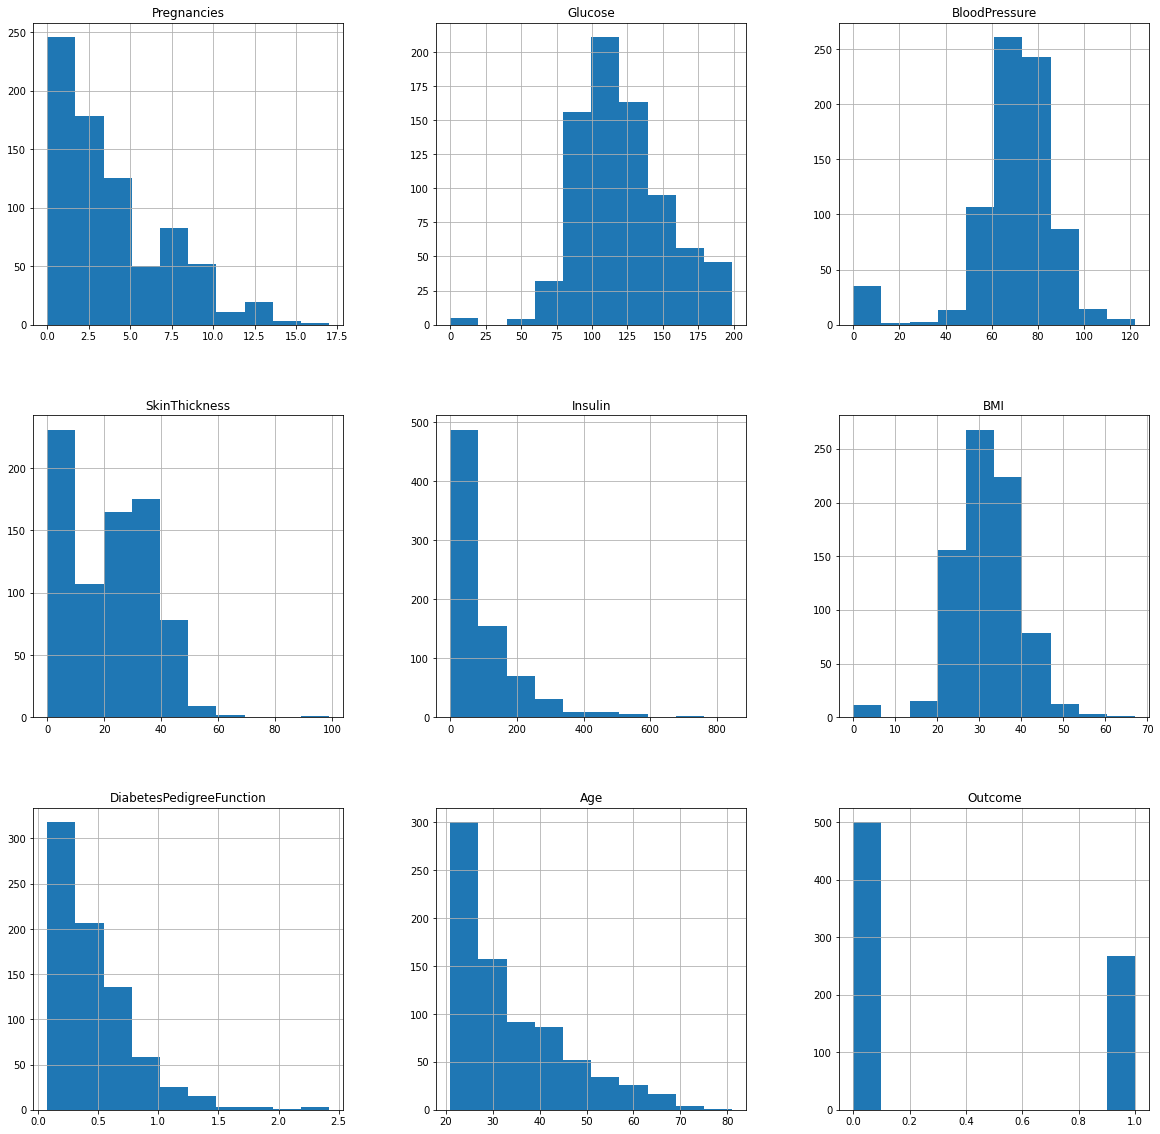

In [10]:
dataframe.hist(figsize=(20,20))

There is no new insight that could be gained from the histogram

# Break Out of Women Depending On Their BMI

In [11]:
bmi_list=pd.Series([]) 
df_copy=dataframe
for i in range(len(df_copy)):  
    if df_copy['BMI'][i] < 18.5: 
        bmi_list[i]="Underweight"
        
    elif df_copy['BMI'][i] < 25: 
        bmi_list[i]="Normal"
  
    elif df_copy['BMI'][i] >= 25 and df_copy['BMI'][i] < 30: 
        bmi_list[i]="Overweight"
  
    elif df_copy['BMI'][i] >= 30: 
        bmi_list[i]="Obese"
        
    else: 
        bmi_list[i]= df_copy['BMI'][i] 
df_copy.insert(6,"BMI TYPE",bmi_list)
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,BMI TYPE,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


#Break Out of Women Depending On Glucose Level

In [12]:
glucose_list=pd.Series([]) 
# n<140 mg/dL (7.8 mmol/L) = Normal

# -----------------------------------------

# 140<n <199 = prediabetes

# --------------------------------------
# 200 mg/dl < n = diabetes
df_copy=dataframe
for i in range(len(df_copy)):   
    if df_copy['Glucose'][i] <= 140: 
        glucose_list[i]="Normal"
        
    elif 140 <df_copy['Glucose'][i] and df_copy['Glucose'][i] <= 198 : 
        glucose_list[i]="Prediabetes"
  
    elif df_copy['Glucose'][i] > 198: 
        glucose_list[i]="Diabetes"
df_copy.insert(3,"Glucose level",glucose_list)
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,Glucose level,SkinThickness,Insulin,BMI,BMI TYPE,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,Prediabetes,35,0,33.6,Obese,0.627,50,1
1,1,85,66,Normal,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,Prediabetes,0,0,23.3,Normal,0.672,32,1
3,1,89,66,Normal,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,Normal,35,168,43.1,Obese,2.288,33,1


# Break Out Of Women Depending On Age(Young vs. Old)
Young women  age range=21-35

Old women age range= 35<age 

In [13]:
age_list=pd.Series([]) 
# n<140 mg/dL (7.8 mmol/L) = Normal

# -----------------------------------------

# 140<n <199 = prediabetes

# --------------------------------------
# 200 mg/dl < n = diabetes
df_copy=dataframe
for i in range(len(df_copy)): 
    if df_copy['Age'][i] <= 35: 
        age_list[i]="Young"
    
    elif df_copy['Age'][i] > 35: 
        age_list[i]="Old"
df_copy.insert(10,"Age Range",age_list)
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,Glucose level,SkinThickness,Insulin,BMI,BMI TYPE,DiabetesPedigreeFunction,Age,Age Range,Outcome
0,6,148,72,Prediabetes,35,0,33.6,Obese,0.627,50,Old,1
1,1,85,66,Normal,29,0,26.6,Overweight,0.351,31,Young,0
2,8,183,64,Prediabetes,0,0,23.3,Normal,0.672,32,Young,1
3,1,89,66,Normal,23,94,28.1,Overweight,0.167,21,Young,0
4,0,137,40,Normal,35,168,43.1,Obese,2.288,33,Young,1


# Visualization among women by age,glucose level, and bmi type

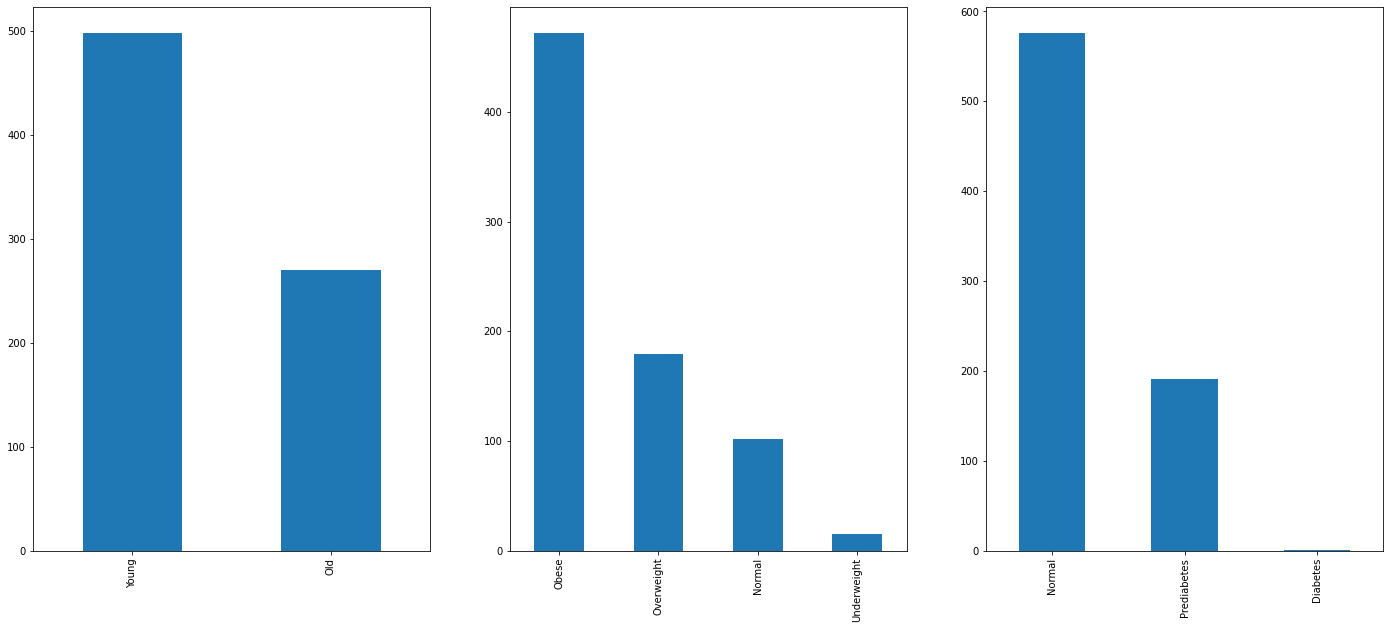

In [14]:
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
df_copy['Age Range'].value_counts().plot(kind='bar')


plt.subplot(1,3,2)
df_copy['BMI TYPE'].value_counts().plot(kind='bar')


plt.subplot(1,3,3)
df_copy['Glucose level'].value_counts().plot(kind='bar')





plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)


In [15]:

# Checking to see the percentage of young vs old women in the dataset

old_perctentage=df_copy[df_copy['Age Range']=='Old']
# print(old_perctentage.shape)
overall= df_copy['Age Range'].shape
# print(overall[0])
x1=old_perctentage.shape




young_perctentage=df_copy[df_copy['Age Range']=='Young']
x2=young_perctentage.shape

breakout1=x1[0]/overall[0]
breakout2=x2[0]/overall[0]







output=pd.DataFrame([breakout1,breakout2])
output


,0
0,0.351562
1,0.648438


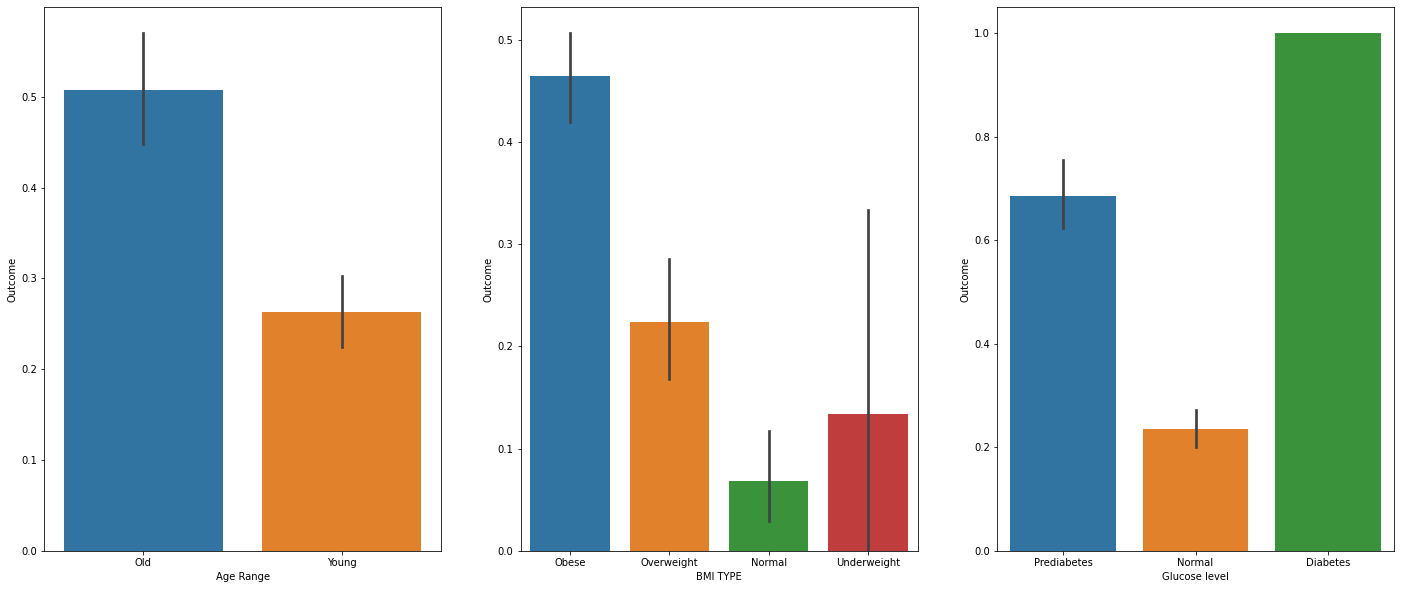

In [16]:
plt.subplot(1,3,1)
sns.barplot(x='Age Range',y='Outcome',data=df_copy)

plt.subplot(1,3,2)
sns.barplot(x='BMI TYPE',y='Outcome',data=df_copy)


plt.subplot(1,3,3)
sns.barplot(x='Glucose level',y='Outcome',data=df_copy)



plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)

**Graph1:** This is an interesting graph that visualize that depending on the age. Older women have more than twice chance of becoming diabetes. 

**Graph 2:** None of the women who are underweight have diabetes

**Graph 3:** No surprising information because high glucose level lead to diabetes. 


From these 3 graphs it could be seen than majority of the women are old,Obese, and therefore have high glucose level . This data clearly is not balanced since there are so much more Old pe



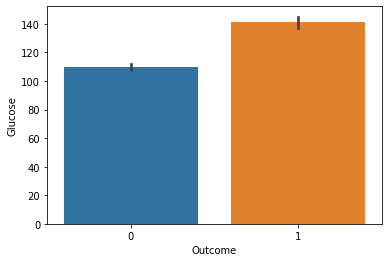

In [17]:
sns.barplot(x='Outcome',y='Glucose',data=dataframe)

In [18]:
# Checking to see how many women are young but have are diabetic
d=df_copy.where((df_copy['Glucose level']=='Diabetes') & (df_copy['Age Range']=='Young')).value_counts()


It's very interesting that among people younger than 33 , there is only 1 woman aged 22 that is considerred as diabetic. Facts that put this woman in diabetic range is one pregnancy , and her BMI range. 

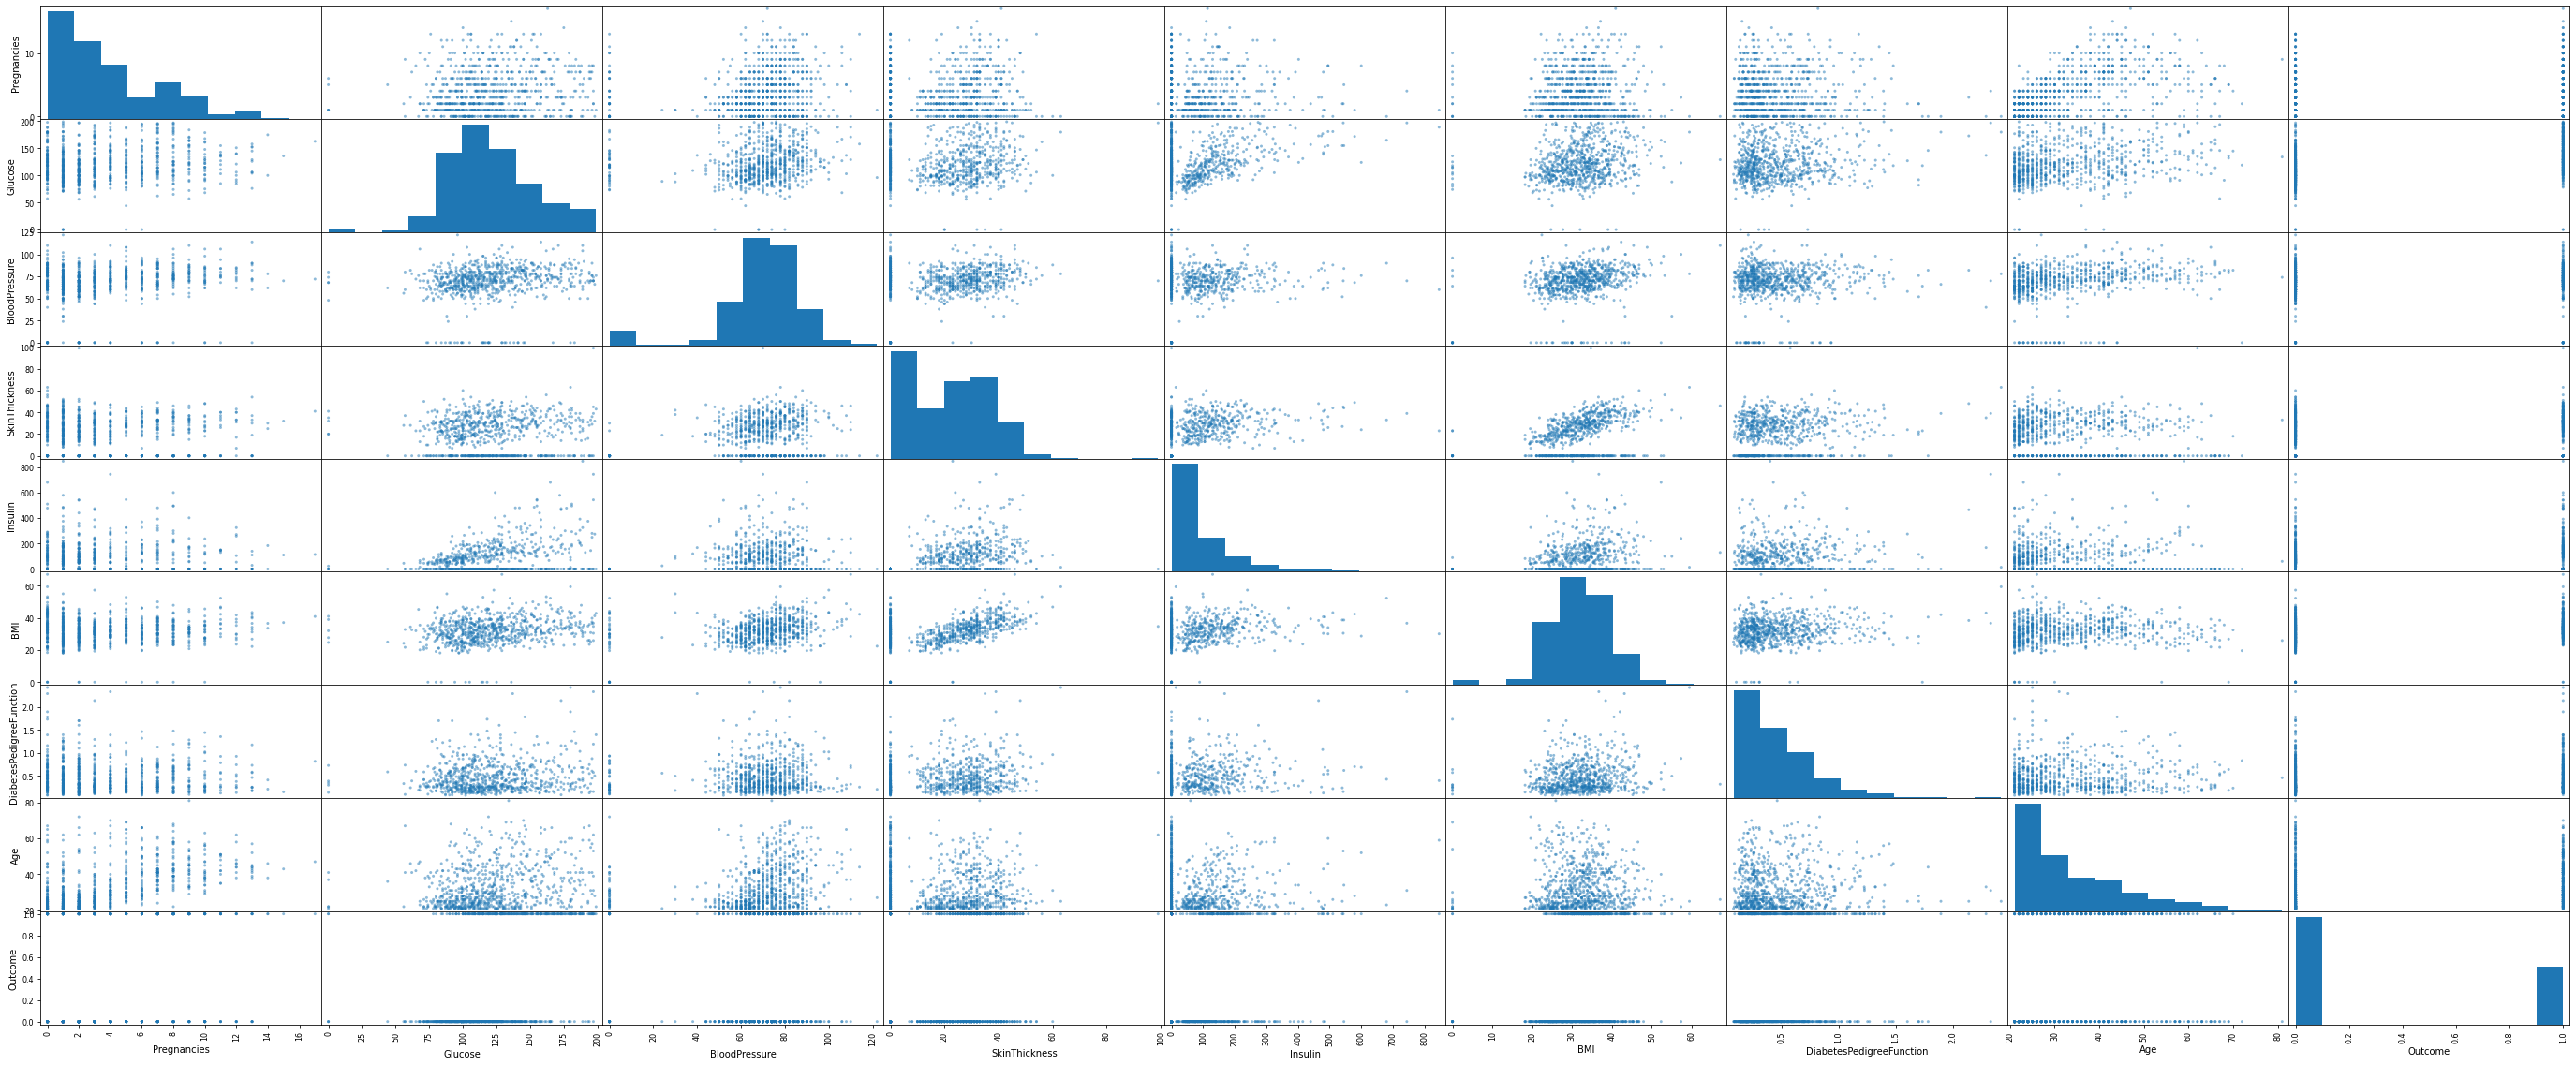

In [19]:
pd.plotting.scatter_matrix(df_copy)
plt.gcf().set_size_inches(20, 20)
plt.subplots_adjust(right=2)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166







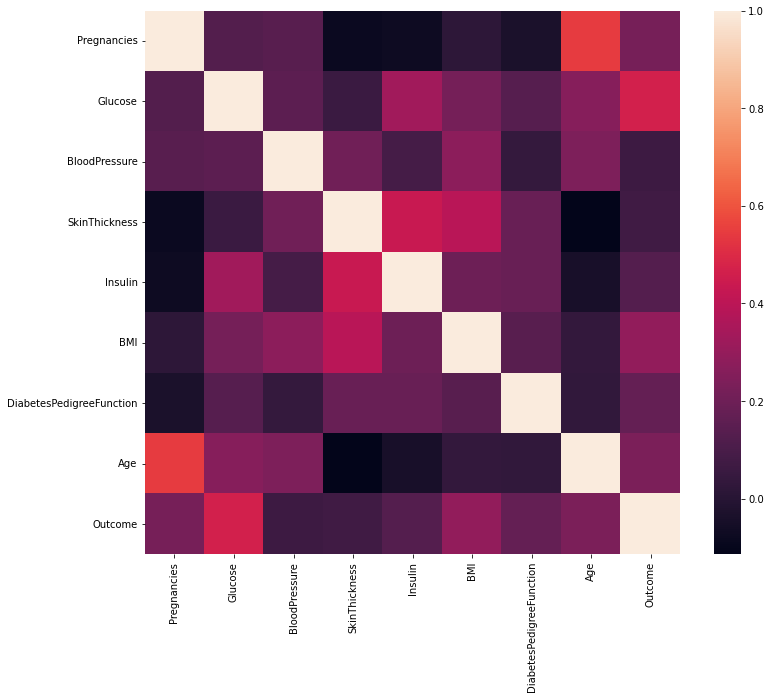

In [20]:
plt.figure(figsize=(12,10))  #
p=sns.heatmap(dataframe.corr())

#Data Prepration

### Removing the 0's from the dataset

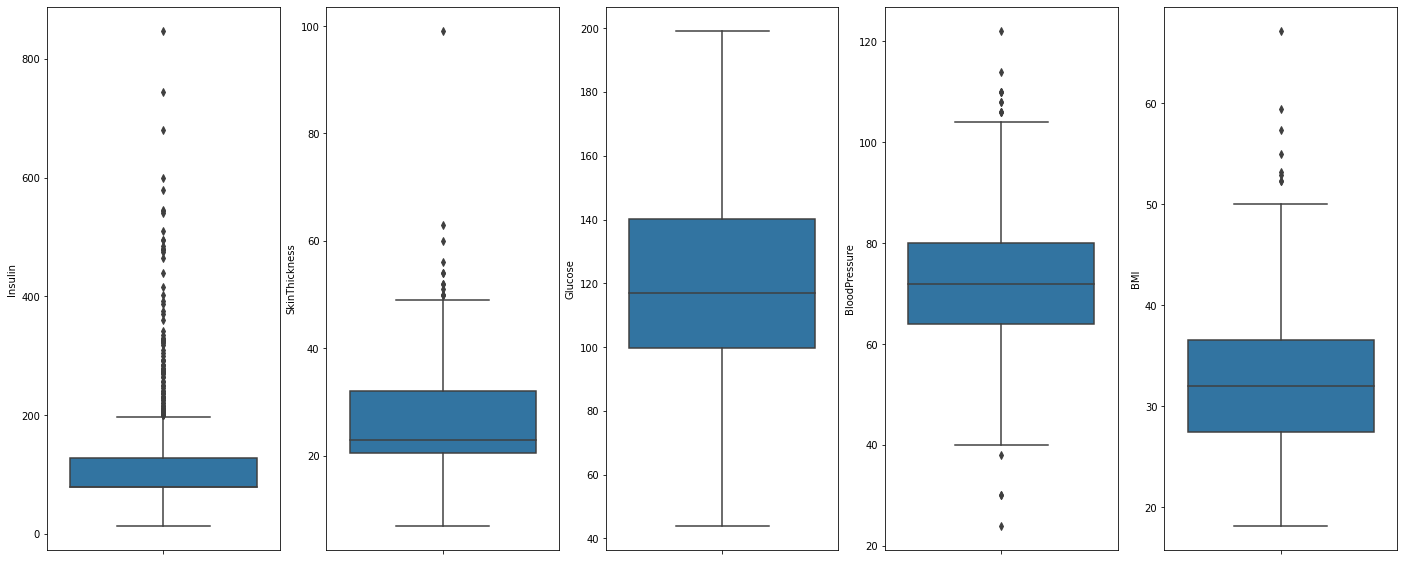

In [21]:
df_copy['Insulin']=df_copy['Insulin'].replace(0,df_copy['Insulin'].mean())
df_copy['SkinThickness']=df_copy['SkinThickness'].replace(0,df_copy['SkinThickness'].mean())
df_copy['Glucose']=df_copy['Glucose'].replace(0,df_copy['Glucose'].mean())
df_copy['BloodPressure']=df_copy['BloodPressure'].replace(0,df_copy['BloodPressure'].mean())
df_copy['BMI']=df_copy['BMI'].replace(0,df_copy['BMI'].mean())




plt.subplot(1,5,1)
sns.boxplot(y='Insulin',x=None,data=df_copy)


plt.subplot(1,5,2)
sns.boxplot(y='SkinThickness',x=None,data=df_copy)


plt.subplot(1,5,3)
sns.boxplot(y='Glucose',x=None,data=df_copy)


plt.subplot(1,5,4)
sns.boxplot(y='BloodPressure',x=None,data=df_copy)

plt.subplot(1,5,5)
sns.boxplot(y='BMI',x=None,data=df_copy)




plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)

In [22]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The zeros are removed and dataframe is good

After repalcing all the zeros with the mean of the column , the most noticible changes that worth pointing out statistic from the table are the following:

Insulin mean went from 79 to 155

SkinThickness went from 20 to 29

The huge rise of Insulin mean shows that the women who participated in the suvery are most diabetic since majority of women are older after the earlier analysis 






# Scaling and normalizing the data
It's important to scale the data since each attribute are scaled differently 

In [23]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
frame=dataframe[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()
scaled_frame=scale.fit_transform(frame)

new_frame=pd.DataFrame(scaled_frame)
new_frame.head()


# df_copy.corr()

,0,1,2,3,4,5,6,7
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve






target=dataframe['Outcome'].copy()
features=dataframe.drop(['Outcome','Glucose level','BMI TYPE','Age Range'],axis=1)


X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=0)



lm=LogisticRegression()
lm.fit(X_train,y_train)
y_predic=lm.predict(X_test)
prediction=pd.DataFrame(y_predic)
# y_predic



print(classification_report(y_test,y_predic,digits=7))










              precision    recall  f1-score   support

           0  0.7957746 0.8692308 0.8308824       130
           1  0.6600000 0.5322581 0.5892857        62

    accuracy                      0.7604167       192
   macro avg  0.7278873 0.7007444 0.7100840       192
weighted avg  0.7519308 0.7604167 0.7528668       192



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Metrics

In [25]:
# scores


accuracy=accuracy_score(y_test,y_predic)
recall=recall_score(y_test,y_predic)
precision=precision_score(y_test,y_predic)
f1=f1_score(y_test,y_predic)


tp=((y_test==1) & (y_test == y_predic)).sum()
tn=((y_test==0) & (y_test == y_predic)).sum()
fp=((y_test==0) & (y_test != y_predic)).sum()
fn=((y_test==1) & (y_test != y_predic)).sum()



accuracy2= (tp+tn)/(tp+tn+fp+fn)
recall2= tp/(tp+fn)
precision2=(tp)/(tp+fp)
f1_2=(2*precision2*recall)/(precision2 + recall2)
specifity2=(tn/(tn+tp))







print("Accuracy", accuracy2)
print("Accuracy", accuracy,'\n')

print("Recall", recall2)
print("Recall", recall,'\n')


print("Precision", precision2)
print("Precision", precision,'\n')


print("F1", f1_2)
print("F1", f1,'\n')

print("Specifity", specifity2,'\n')










Accuracy 0.7604166666666666
Accuracy 0.7604166666666666 

Recall 0.532258064516129
Recall 0.532258064516129 

Precision 0.66
Precision 0.66 

F1 0.5892857142857142
F1 0.5892857142857142 

Specifity 0.773972602739726 



#Cross Tab

In [26]:
pd.crosstab(y_test,y_predic,margins=True,margins_name="Total",dropna=False)

col_0,0,1,Total
Outcome,,,
0,113,17,130
1,29,33,62
Total,142,50,192


In [27]:
# look at y_predict value counts

prediction.value_counts()

0    142
1     50
dtype: int64

In [28]:
# look at y test value count
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


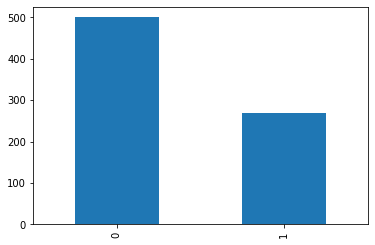

In [47]:
frame2=dataframe[['Pregnancies', 'Glucose','BMI', 'Age','SkinThickness'	,'Insulin','Outcome']]
print(frame2.Outcome.value_counts())
frame2.Outcome.value_counts().plot(kind="bar")






Remember that (0 if non-diabetic, 1 if diabetic),

As the bar graph shows there are much more non-diabetic than diabetic.Clearly, the data is imbalance since the number of non-diabetic is 2 times of the number of diabetic women. 

# SMOTE the dataset to fix the imbalancy of the data


In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
target2=frame2['Outcome']
features2=frame2.drop('Outcome',axis=1)

X_train2,X_test2,y_train2,y_test2 = train_test_split(features2,target2,test_size=0.25,random_state=0)




# define pipeline
over= SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)



#transform the dataset
X_smote,y_smote=pipeline.fit_resample(X_train2,y_train2)





model2=LogisticRegression()
model2.fit(X_smote,y_smote)
prediction2=model2.predict(X_test2)







accuracy=accuracy_score(y_test2,prediction2)
recall=recall_score(y_test2,prediction2)
precision=precision_score(y_test2,prediction2)
f1=f1_score(y_test2,prediction2)







print("Accuracy", accuracy,'\n')
print("Recall", recall,'\n')
print("Precision", precision,'\n')
print("F1", f1,'\n')


Accuracy 0.765625 

Recall 0.5806451612903226 

Precision 0.6545454545454545 

F1 0.6153846153846153 



SMOTE isn't really about changing f-measure or accuracy... it's about the trade-off between precision vs. recall.

By using SMOTE you can increase recall at the cost of precision, if that's something you want. 


As it can be observe , after the Smote the recall came from 0.53 to 0.58 and precision droped by 6%. Also, accuracy increased by 2% which is pretty good.  

https://stats.stackexchange.com/questions/97555/handling-unbalanced-data-using-smote-no-big-difference

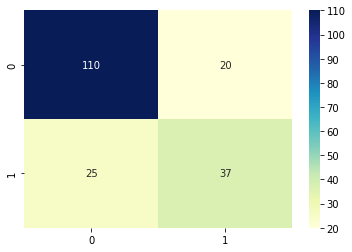

In [31]:
cnf_matrix=confusion_matrix(y_test2,prediction2)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')


The confusion matrix is saying 110 of the cases are correcly classified as true negative, while 25 negatives are mistakenly classified as positive. On the other hand 37 are correctly classified positive and 20 of the positives are classified negative by the model . 

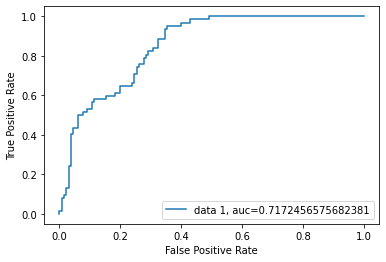

In [51]:
from sklearn import metrics
fpr,tpr, _ =roc_curve(y_test2,model2.predict_proba(X_test2)[:,1])
auc=roc_auc_score(y_test2,prediction2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Receiver Operator Characteristic (ROC) summarize sensivity and specifity of the model. The y-axis is the True Positive Rate and X-axis is false positive rate. 

AUC or area under the curve is 0.717 which is a fair value since the model does a fair job of determining the true positive cases within. 

The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6





# Chi-Square Test and p value assessment

In [34]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import statsmodels.api as sm
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(features2,target2)
feature_score =pd.DataFrame()
for i in range(features2.shape[1]):
  new = pd.DataFrame({'Features':features2.columns[i],
                      'Score': fit.scores_[i]},index=[i])
  feature_score=pd.concat([feature_score, new])




result=sm.OLS(y_train2,X_train2).fit()
print(result.summary())



print(feature_score)




                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.464
Model:                            OLS   Adj. R-squared (uncentered):              0.460
Method:                 Least Squares   F-statistic:                              123.8
Date:                Fri, 24 Jun 2022   Prob (F-statistic):                    4.69e-76
Time:                        23:42:27   Log-Likelihood:                         -341.59
No. Observations:                 576   AIC:                                      691.2
Df Residuals:                     572   BIC:                                      708.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

By Looking at the p values, we can see that Glucose and number of pregnancies among women are the most 2 important attributes for the outcome of being diabetic or not.  

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
r=knn.fit(X_train2,y_train2)
a=r.predict(X_test2)
print(classification_report(y_test2,a,digits=7))


              precision    recall  f1-score   support

           0  0.7816901 0.8538462 0.8161765       130
           1  0.6200000 0.5000000 0.5535714        62

    accuracy                      0.7395833       192
   macro avg  0.7008451 0.6769231 0.6848739       192
weighted avg  0.7294777 0.7395833 0.7313769       192



# Comparison between KNN model and logistic model

Comparing the logistic model and the KNN model, we see that Logistic model has much better precision than the KNN model and also the accuracy for the logistic model is 0.76 versus the one for KNN which is 0.73. 

# Summary
At first, there was a detail look into every piece of data. I tried to make additional attributes and dig into the data to extract more information. After careful analyzation , I tried to fill out the missing data using the fillin() method. Then, using all the attributes, I made a logistic regression model. After careful studying the correlation table, I decided to eliminate two attributes, keeping 'Pregnancies', 'Glucose','BMI','Insulin', 'SkinThickness'm 'Age', and'Outcome'. Then, I tried to look at the the balance of the data by comparing the number of diabetic and non diabetic participants. It was clear to me that diabetic participants were almost 2 times more than the non-diabetics . I used the SMOTE tool to make some additional data in order to see how it could effect the performance of the model. It had a minor effect on the precision and recall metrics. After looking at true-positive and true-negative rates , I made another model using KNN algorithm. KNN was not better than logistic regression because of lower accuracy and precision and therefore I prefer Logistic Regression Model for this dataset.  